# Finding Feasible Counterfactual Explanations (FCX)

Feasible Counterfactual Explanations (FCX) is a novel framework that generates realistic and low-cost counterfactuals by enforcing both hard feasibility constraints provided by domain experts and soft causal constraints inferred from data. Built on a modified Variational Autoencoder and optimized with a multi-factor loss function, FCX produces sparse, diverse, and actionable counterfactuals while preserving causal relationships, offering both individual-level explanations and global model feasibility assessments across multiple datasets.

### Law school Dataset Example

This notebook demonstrates preparation, training, and evaluation of the FCX models  
specifically for the **Law school** dataset.  
We will:
1. Unpack the preprocessed data  
2. (Optional) Fine‑tune the black‑box model  
3. Train the unary and binary counterfactual generators  
4. Evaluate the trained generators  

In [ ]:
# Unzip the Adult dataset archive
#!7z x data.7z -o ./data


Load paths

In [1]:
import sys, os
import importlib.util
exp_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain'))
sys.path.insert(0, exp_dir)

fcx_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain','fcx'))
sys.path.insert(0, fcx_dir)

# compute absolute path to the `scripts` folder
scripts_dir = os.path.abspath(
    os.path.join('..', '..', 'humancompatible', 'explain', 'fcx', 'scripts')
)
sys.path.append(scripts_dir)
# 1) Compute the full path to your script
script_path = os.path.abspath(
    os.path.join('..','..','humancompatible','explain','fcx','scripts','blackbox-model-train.py')
)
# 2) Create a module spec and module object
spec = importlib.util.spec_from_file_location("blackbox_model_train", script_path)
bb_mod = importlib.util.module_from_spec(spec)

# 3) Execute the module in its own namespace
spec.loader.exec_module(bb_mod)

# 4) Extract the function
train_blackbox = bb_mod.train_blackbox

## 1. (Optional) Fine‑tune the black‑box model for Law school

Run this first if the provided checkpoint isn’t compatible.

In [2]:


# Fine-tune/load the black‑box model
train_blackbox('law')

   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4    5   

   pass_bar  
0         1  
1         1  
2         1  
3         1  
4         1  
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4

BlackBox(
  (predict_net): Sequential(
    (0): Linear(in_features=21, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=2, bias=True)
  )
)

## 2. Train FCX on the Law school dataset

Next, we train the **unary** generator, then the **binary** generator.

In [ ]:

from FCX_unary_generation_law import train_unary_fcx_vae
#!pip install networkx==2.8
# Call it for the Adult dataset
train_unary_fcx_vae(
    'law',
    base_data_dir='../../data/',
    base_model_dir='../models/',
    batch_size=2048, #2048
    epochs=25, #50
    validity=29.0,
    feasibility=192.0,
    margin=0.364
)

   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4    5   

   pass_bar  
0         1  
1         1  
2         1  
3         1  
4         1  
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4

c:\Users\kleop\Downloads\explain-main\humancompatible\explain\fcx\scripts\fcx_vae_model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  c=torch.tensor(c).float()
c:\Users\kleop\Anaconda3\envs\explain\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


recon:  tensor(26.6310, device='cuda:0', grad_fn=<NegBackward0>)  KL:  tensor(0.0858, device='cuda:0', grad_fn=<MeanBackward0>)  Validity:  tensor([22.1329], device='cuda:0', grad_fn=<NegBackward0>)  Reg:  tensor(1.5626, device='cuda:0', grad_fn=<DivBackward0>)  Sparsity:  tensor([1.7923], device='cuda:0', grad_fn=<MulBackward0>)
Train Avg Loss:  81.915283203125 826
----Epoch: 0 Loss: 81.915283203125 Best: 81.915283203125
recon:  tensor(25.4909, device='cuda:0', grad_fn=<NegBackward0>)  KL:  tensor(0.0905, device='cuda:0', grad_fn=<MeanBackward0>)  Validity:  tensor([21.0412], device='cuda:0', grad_fn=<NegBackward0>)  Reg:  tensor(1.5623, device='cuda:0', grad_fn=<DivBackward0>)  Sparsity:  tensor([1.7769], device='cuda:0', grad_fn=<MulBackward0>)
Train Avg Loss:  75.549072265625 826
----Epoch: 1 Loss: 75.549072265625 Best: 75.549072265625


## 3. Evaluate the trained models (Law school)

Run evaluation scripts to compute validity and feasibility metrics.

{13: 6, 14: 5, 15: 4, 16: 3, 17: 2, 18: 1}
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4    5   

   pass_bar  
0         1  
1         1  
2         1  
3         1  
4         1  
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        

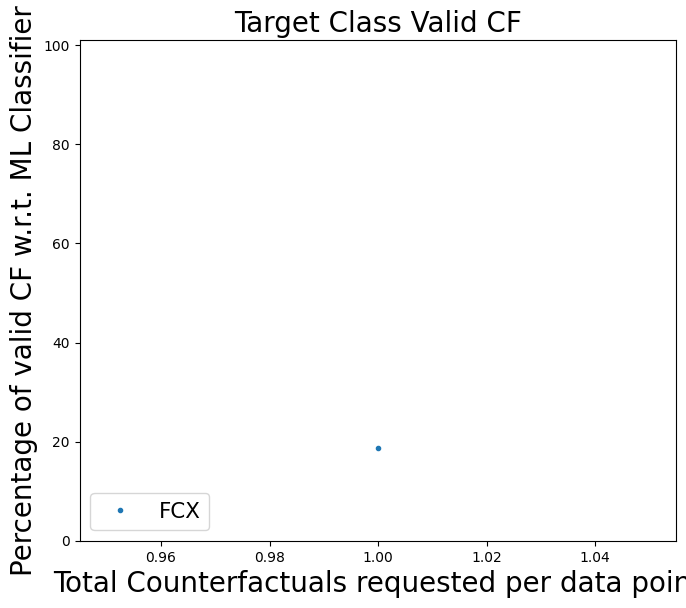

[18.66666667]
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  66.66666666666667 33.333333333333336 0.6666666666666667
Mean Age Constraint Score:  50.0 50.0 0.5
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  100.0 0.0 1.0
Mean Age Constraint Score:  100.0 0.0 1.0


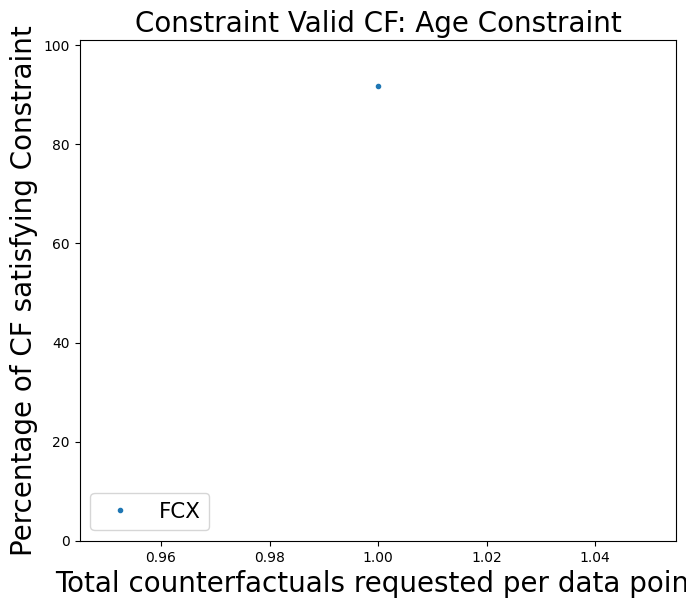

[91.66666667]
Mean Proximity Score:  -8.872563835218841
Mean Proximity Score:  -9.506821498138454
Mean Proximity Score:  -9.463716457404342
Mean Proximity Score:  -9.39373305498385
Mean Proximity Score:  -9.215332868597866
Mean Proximity Score:  -9.460749672285093
Mean Proximity Score:  -9.429486390811945
Mean Proximity Score:  -9.146019526478513
Mean Proximity Score:  -9.034562801223954
Mean Proximity Score:  -9.139071718695897


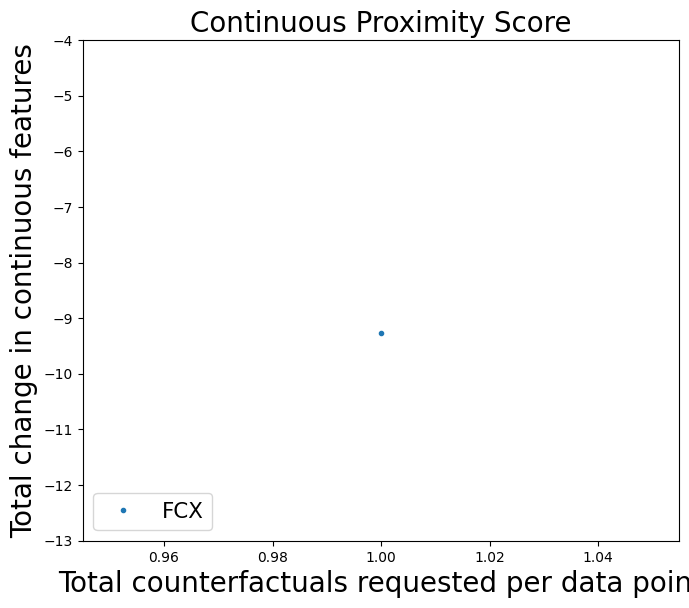

[-9.26620578]
Mean Proximity Score:  -2.066666666666667
Mean Proximity Score:  -2.0
Mean Proximity Score:  -1.8
Mean Proximity Score:  -1.6666666666666667
Mean Proximity Score:  -1.8
Mean Proximity Score:  -1.8666666666666667
Mean Proximity Score:  -1.7333333333333334
Mean Proximity Score:  -1.9333333333333333
Mean Proximity Score:  -2.066666666666667
Mean Proximity Score:  -1.8666666666666667


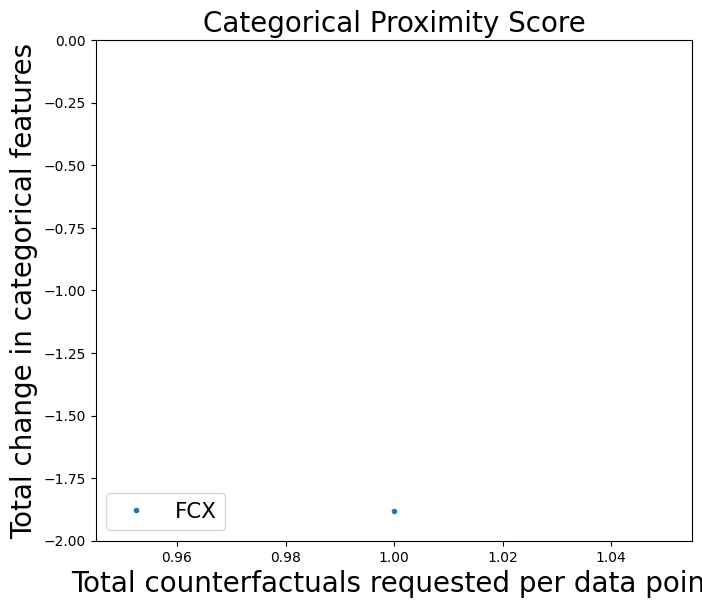

[-1.88]
----->> Current Average lof score 1.0006709098815918
----->> Current Average lof score 1.0003517866134644
----->> Current Average lof score 1.0
----->> Current Average lof score 1.0000535249710083
There are not enough valid CF examples for LOF calculation. Please increase Validity


NameError: name 'exit' is not defined

<Figure size 770x650 with 0 Axes>

In [ ]:

from evaluate_unary_law import evaluate_law
import warnings
warnings.filterwarnings("ignore")
res = evaluate_law(
    base_data_dir='../../data/',
    base_model_dir='../models/',
    dataset_name='law',
    pth_name = 'law-margin-0.364-feasibility-192.0-validity-29.0-epoch-25-fcx-unary.pth'
)
print(res)

Read the results from csv files